In [1]:
#imported required packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sn
import scipy as sc

In [2]:
#reading file 
data=pd.read_csv('fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
#print data types
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

## Cleaning data

In [4]:
#checking for duplicate value
duplicate=data.duplicated()
data[duplicate]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [5]:
#sorting  data acc. to id 
data.sort_values(by=['id'])

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [6]:
#checking for future date 
today_date=dt.date.today()
data[(data['date']>'today_date')]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [7]:
#reseting id 
data.drop(['id'], axis=1,inplace=True)
data.insert(0, 'ID', data.index + 1)
data

,ID,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5412,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5413,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5414,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5415,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [8]:
#checking for nan values 
nan_in_data = data.isnull().sum().sum() 
nan_in_data

1234

In [9]:
#droping nan value
data.dropna(inplace=True)

In [10]:
data

,ID,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,5409,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,True
5409,5410,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5410,5411,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,False
5411,5412,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False


In [11]:
#for getting all information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4399 entries, 0 to 5413
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4399 non-null   int64  
 1   name                     4399 non-null   object 
 2   date                     4399 non-null   object 
 3   manner_of_death          4399 non-null   object 
 4   armed                    4399 non-null   object 
 5   age                      4399 non-null   float64
 6   gender                   4399 non-null   object 
 7   race                     4399 non-null   object 
 8   city                     4399 non-null   object 
 9   state                    4399 non-null   object 
 10  signs_of_mental_illness  4399 non-null   bool   
 11  threat_level             4399 non-null   object 
 12  flee                     4399 non-null   object 
 13  body_camera              4399 non-null   bool   
dtypes: bool(2), float64(1), 

In [12]:
data.describe()

,ID,age
count,4399.000000,4399.000000
mean,2590.711753,36.632871
std,1561.696424,12.803017
min,1.000000,6.000000
25%,1220.500000,27.000000
50%,2540.000000,34.000000
75%,3933.000000,45.000000
max,5414.000000,91.000000


In [13]:
data.columns

Index(['ID', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [14]:
data.shape

(4399, 14)

<AxesSubplot:>

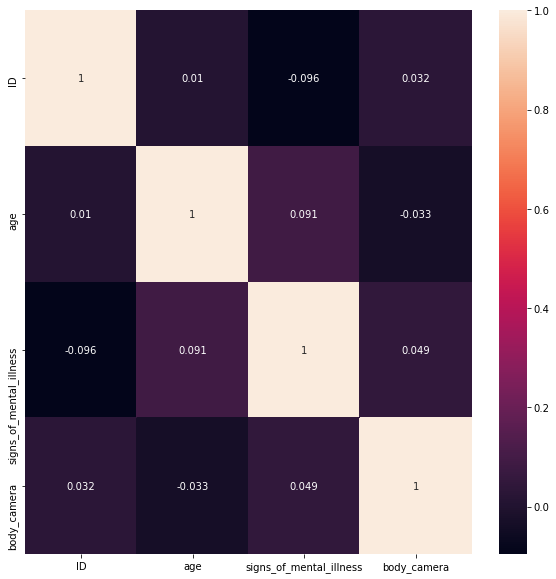

In [15]:
plt.figure(figsize = (10,10))
sn.heatmap(data.corr(), annot=True)